# MNIST ft. Tensorflow

In [1]:
# load modules
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.python.framework import ops
from sklearn.model_selection import train_test_split

%matplotlib inline

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  retu

## Tools

In [2]:
def convert_to_one_hot(Y,C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

In [3]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data
    Y -- true "label" vector
    seed -- random seed
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """

    m = X.shape[1] # number of records
    mini_batches = []
    np.random.seed(seed)
    
    # step 1: Shuffle (X, Y)
    permutations = list(np.random.permutation(m))
    X = X[:, permutations]
    Y = Y[:,permutations].reshape((Y.shape[0],m))
    
    # step 2: partitions
    num_complete_minibatches = math.floor(m/mini_batch_size)
    for k in range(0, num_complete_minibatches):
        mini_batch_X = X[:, k * mini_batch_size : (k + 1) * mini_batch_size]
        mini_batch_Y = Y[:, k * mini_batch_size : (k + 1) * mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # step 3: incomple batch
    if m%mini_batch_size!=0:
        mini_batch_X = X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [25]:
def predict(X, parameters):
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}
    
    x = tf.placeholder("float", [12288, 1])
    
    z3 = forward_propagation_for_predict(x, params)
    p = tf.argmax(z3)
    
    sess = tf.Session()
    prediction = sess.run(p, feed_dict = {x: X})
        
    return prediction

In [ ]:
def forward_propagation_for_predict(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3'] 
                                                           # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                     # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                     # Z3 = np.dot(W3,Z2) + b3
    
    return Z3

## Import data 

In [4]:
# Load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
# Display data structure
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Size and info
print("*****INFO*****")
print(train.info())
print("\n*****SHAPE*****")
print(train.shape)

*****INFO*****
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None

*****SHAPE*****
(42000, 785)


In [7]:
# Separate the dataframe into the classes and the features
Y_train = train['label'].values
X_train = train.drop(labels=['label'],axis=1).values

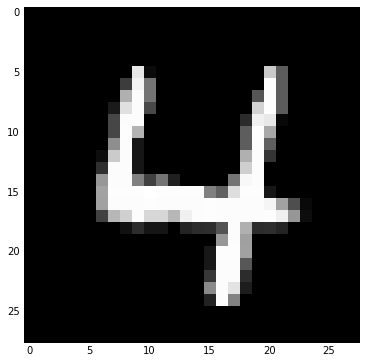

In [8]:
# Plot a single image
# Per the information of this project, the original image are 28x28 pixels in dimension.
fig = plt.figure(num=None, figsize=(8, 6))
plt.imshow(X_train[42].reshape(28,28),interpolation='nearest',cmap='gray');

In [9]:
# Normalize image
X_train = X_train / 255

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=1)

# Convert training labels to one hot matrices
Y_train = convert_to_one_hot(Y_train,10)
Y_test = convert_to_one_hot(Y_test,10)

X_train, X_test, Y_train, Y_test = X_train.T, X_test.T, Y_train.T, Y_test.T

# print information
print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 33600
number of test examples = 8400
X_train shape: (784, 33600)
Y_train shape: (10, 33600)
X_test shape: (784, 8400)
Y_test shape: (10, 8400)


**The model** is *LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX*. The SIGMOID output layer has been converted to a SOFTMAX. A SOFTMAX layer generalizes SIGMOID to when there are more than two classes. 

**Procedure:**
1. Create placeholders (X, y)
2. Initialize parameters (W, b)
3. Forward propagation
4. Compute cost
5. Assemble the model

In [10]:
def create_placeholders(n_x, n_y):
    """
    Create the placeholders for the tensorflow session.
    
    Arguments:
    n_x scalar, size of an image vector
    n_y sclar, number of classes
    
    Returns
    X placeholder for the data input of shape [n_y,?] and dtype "float"
    Y placeholder for the input labels of shape [n_x,?] and dtype "float
    """
    
    X = tf.placeholder(shape=(n_x,None), dtype=tf.float32, name='X')
    Y = tf.placeholder(shape=(n_y,None), dtype=tf.float32, name='Y')
    
    return X, Y

In [11]:
def initialize_parameters():
    """
    Initialize the parameters to build the neural network. They are:
        - W1 : [25, n_x]
        - b1 : [25, 1]
        - W2 : [12, 25]
        - b2 : [12, 1]
        - W3 : [10, 12]
        - b3 : [10, 1]
        
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    tf.set_random_seed(0)
    
    W1 = tf.get_variable(shape=(25,784), dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer(seed=1), name='W1')
    b1 = tf.get_variable(shape=(25,1), dtype=tf.float32, initializer=tf.zeros_initializer(), name='b1')
    W2 = tf.get_variable(shape=(12,25), dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer(seed=1), name='W2')
    b2 = tf.get_variable(shape=(12,1), dtype=tf.float32, initializer=tf.zeros_initializer(), name='b2')
    W3 = tf.get_variable(shape=(10,12), dtype=tf.float32, initializer=tf.contrib.layers.xavier_initializer(seed=1), name='W3')
    b3 = tf.get_variable(shape=(10,1), dtype=tf.float32, initializer=tf.zeros_initializer(), name='b3')
    
    parameters = {'W1':W1, 'b1':b1, 'W2':W2, 'b2':b2, 'W3':W3, 'b3':b3}
    return parameters    

In [12]:
def forward_propagation(X, parameters):
    """
    Implement the forward propabation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder
    parameters -- dictionary containing the NN parameters (W1, b1, W2, b2, W3, b3)
    
    Returns:
    Z3 -- output layer
    """
    # extract parameters
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1 = tf.add(tf.matmul(W1,X),b1)
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1),b2)
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2),b3)
    
    return Z3

In [13]:
def compute_cost(Z3, Y):
    """
    Compute cost
    
    Arguments:
    Z3 -- output of the forward propagation
    Y -- true labels
    
    Retuns
    cost -- tensor of the cost function
    """
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
    return cost

In [45]:
def deep_neural_model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32*2*2*2, print_cost = True):
    
    # enable rerun 
    ops.reset_default_graph()
    tf.set_random_seed(1)
    seed = 3
    
    # extract shapes
    (n_x, m) = X_train.shape
    n_y = Y_train.shape[0]
    
    # instantiate cost
    costs = []
    
    # create placeholders
    X, Y = create_placeholders(n_x, n_y)
    
    # initialize parameters
    parameters = initialize_parameters()
    
    # perform forward propagation
    Z3 = forward_propagation(X=X, parameters=parameters)
    
    # compute cost
    cost = compute_cost(Z3, Y)
    
    # backpropabation using Adam optimizer
    optimizer =tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    
    # initialize all the variables
    init = tf.global_variables_initializer()
    
    # start session
    with tf.Session() as sess:
        
        # run the initialization
        sess.run(init)
        
        # perform training using mini-batch
        for epoch in range(num_epochs):
            
            epoch_cost = 0.
            num_minibatches = int(m / minibatch_size)
            seed += 1
            
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
            
            for minibatch in minibatches:
                
                # extract mini-batches
                (minibatch_X, minibatch_Y) = minibatch
                # run optimizer
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
            
                # add cost to epoch cost
                epoch_cost += minibatch_cost / num_minibatches
            
            # print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
            
        # plot cost
        fig, ax = plt.subplots(figsize=(15,8))
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show();
        
        # save the parameters
        parameters = sess.run(parameters)
        print('Parameters have been trained.')
        
        # extract correct prediction
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))
        
        # accuracy
        accuracy = tf.reduce_mean(tf.cast(correct_prediction,'float'))
        
        # errors on test set
        incorrect_prediction = tf.not_equal(tf.argmax(Z3),tf.argmax(Y))
        
        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        

        return parameters, incorrect_prediction.eval({X: X_test, Y: Y_test})

Cost after epoch 0: 2.157083
Cost after epoch 100: 0.147533
Cost after epoch 200: 0.097033
Cost after epoch 300: 0.069864
Cost after epoch 400: 0.050563
Cost after epoch 500: 0.036363
Cost after epoch 600: 0.025543
Cost after epoch 700: 0.017955
Cost after epoch 800: 0.011061
Cost after epoch 900: 0.006544
Cost after epoch 1000: 0.003551
Cost after epoch 1100: 0.001818
Cost after epoch 1200: 0.000841
Cost after epoch 1300: 0.000355
Cost after epoch 1400: 0.000137


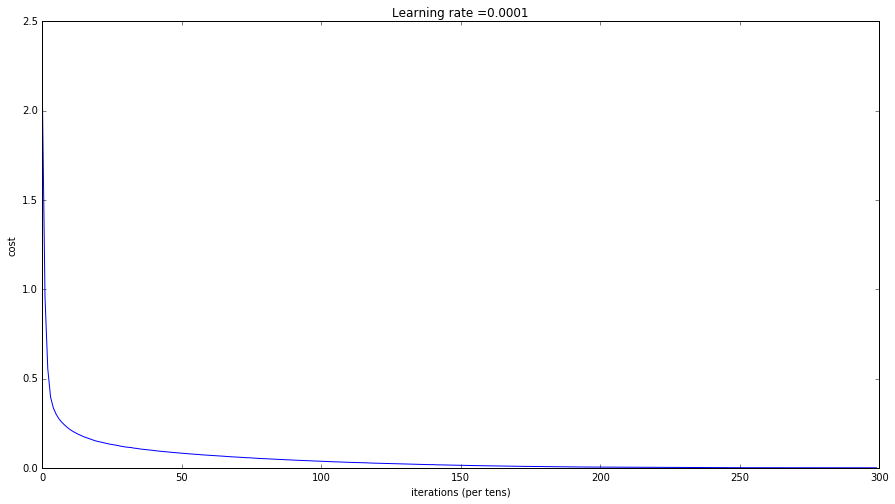

Parameters have been trained.
Train Accuracy: 1.0
Test Accuracy: 0.945119


In [46]:
parameters, incorrect_prediction = deep_neural_model(X_train, Y_train, X_test, Y_test)

In [47]:
test_error = X_test[:,incorrect_prediction]

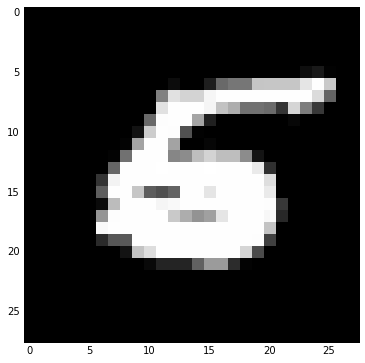

In [49]:
# Plot a single image
# Per the information of this project, the original image are 28x28 pixels in dimension.
fig = plt.figure(num=None, figsize=(8, 6))
plt.imshow(test_error[:,3].reshape(28,28),interpolation='nearest',cmap='gray');

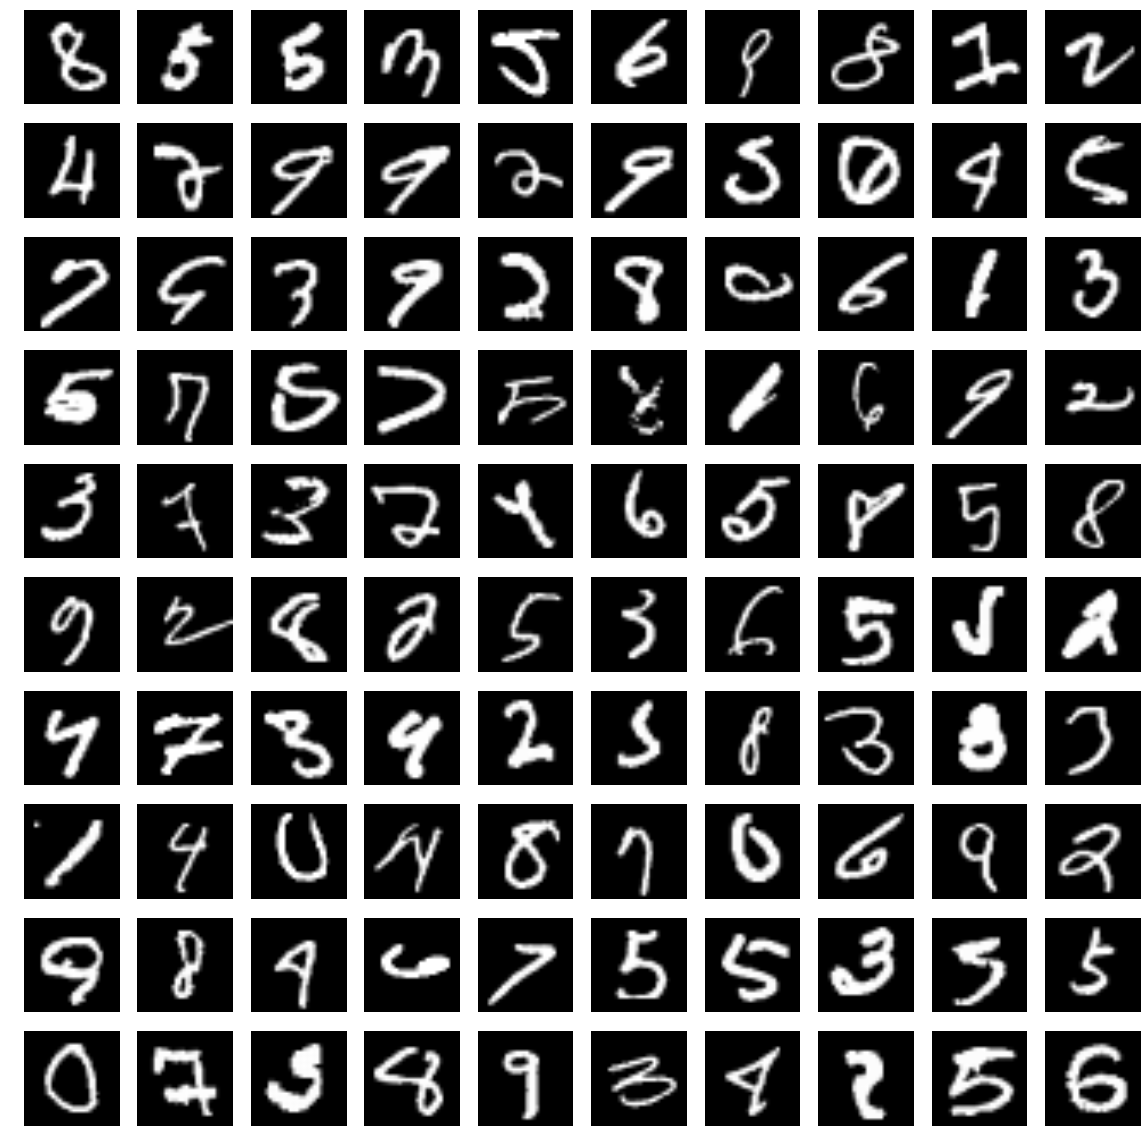

In [57]:
n_line_plot = 10

fig = plt.figure(num=None, figsize=(20, 20))

for idx in range(100):
        col = idx//10
        row = idx%10
        # plot same class column-wise
        plot_idx = col + row*10 + 1
        plt.subplot(n_line_plot,n_line_plot,plot_idx)
        plt.imshow(test_error[:,idx].reshape(28,28),cmap='gray')
    
        # Clean plot (remove axes)
        plt.axis('off')
        #if pos == 0:
        #    plt.title(label,fontsize=18)
    
plt.show() 